## Timeseries API

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'retina'

In [2]:
close = pd.read_csv("../data/sp500_close.csv", index_col = 0, parse_dates = True)

In [3]:
goog = close[['GOOG']].copy().dropna()

def plot_series(series, stock_name = ''):
    fig, ax = plt.subplots(figsize = (12,4))
    series.plot(ax = ax)
    plt.grid(linestyle='--')
    plt.title(f"{stock_name} Stock Price", fontsize = 14)
    plt.ylabel("Price")
    plt.show()

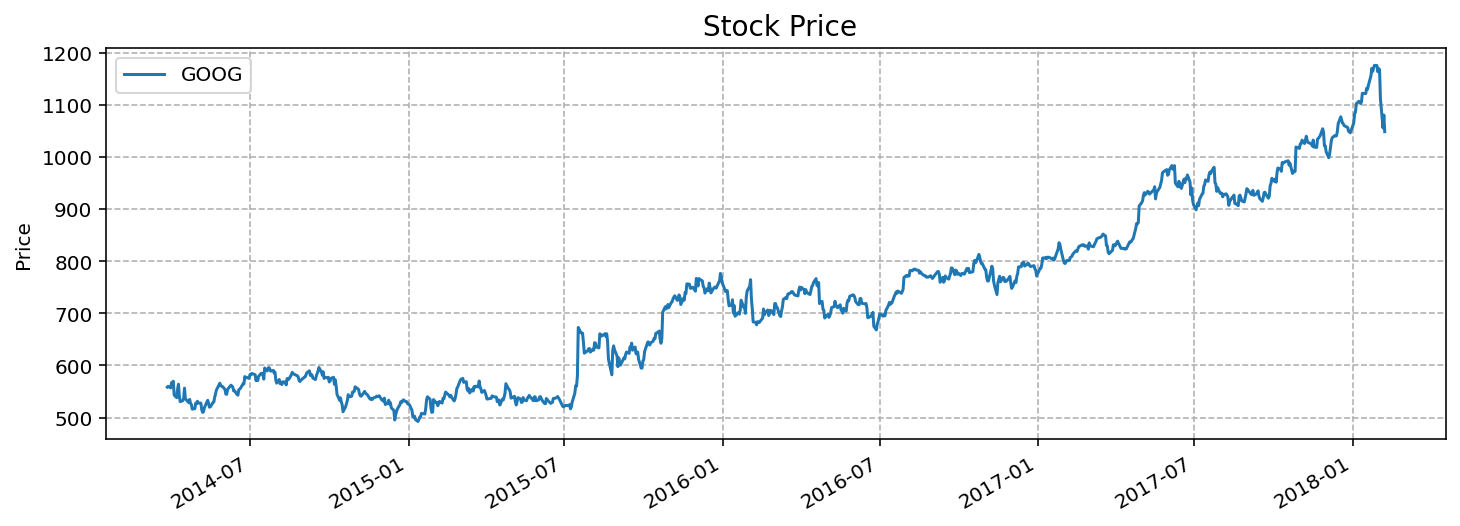

In [4]:
plot_series(goog)

### 1. Simple Moving Average-SMA

In [5]:
goog_ret = np.log(goog.pct_change(1) + 1)
ma_ret = goog_ret.rolling(10).mean()

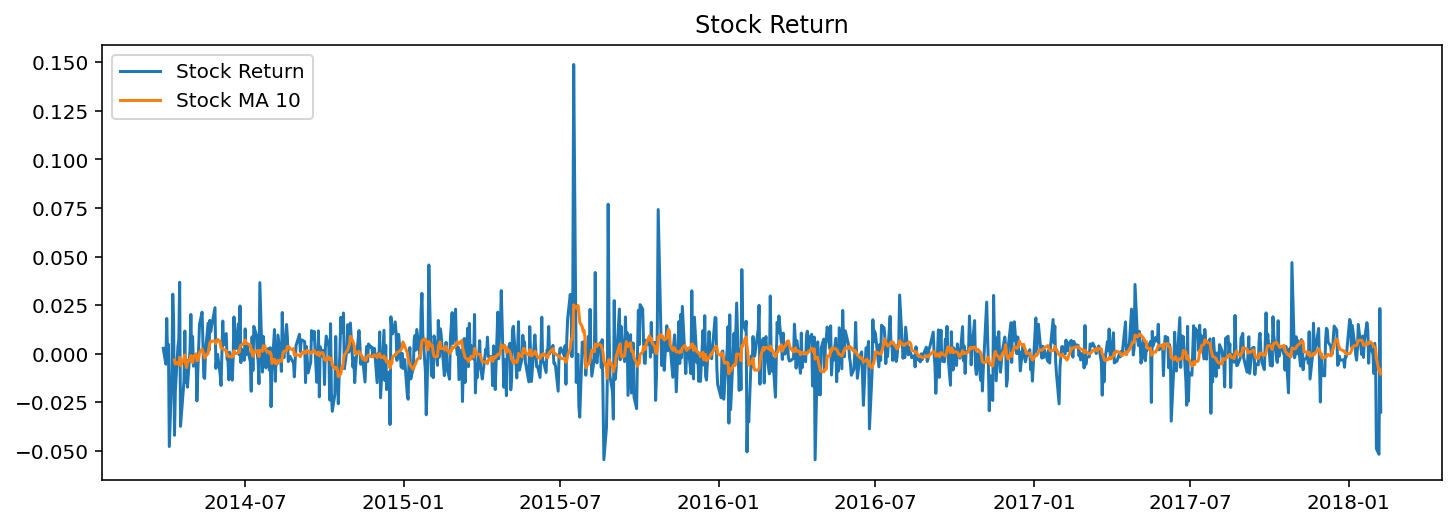

In [6]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(goog_ret, label = 'Stock Return')
plt.plot(ma_ret, label = "Stock MA 10")
plt.title("Stock Return")
plt.legend(loc = 'upper left')
plt.show()

### 2. Exponential Weighted Moving Average-EWMA

In [7]:
airline = pd.read_csv('../data/airline_passengers.csv', 
            index_col='Month', 
            parse_dates = True
           )

In [8]:
alpha = 0.2

ewm_airline = airline['Passengers'].ewm(alpha = alpha, adjust = False).mean()

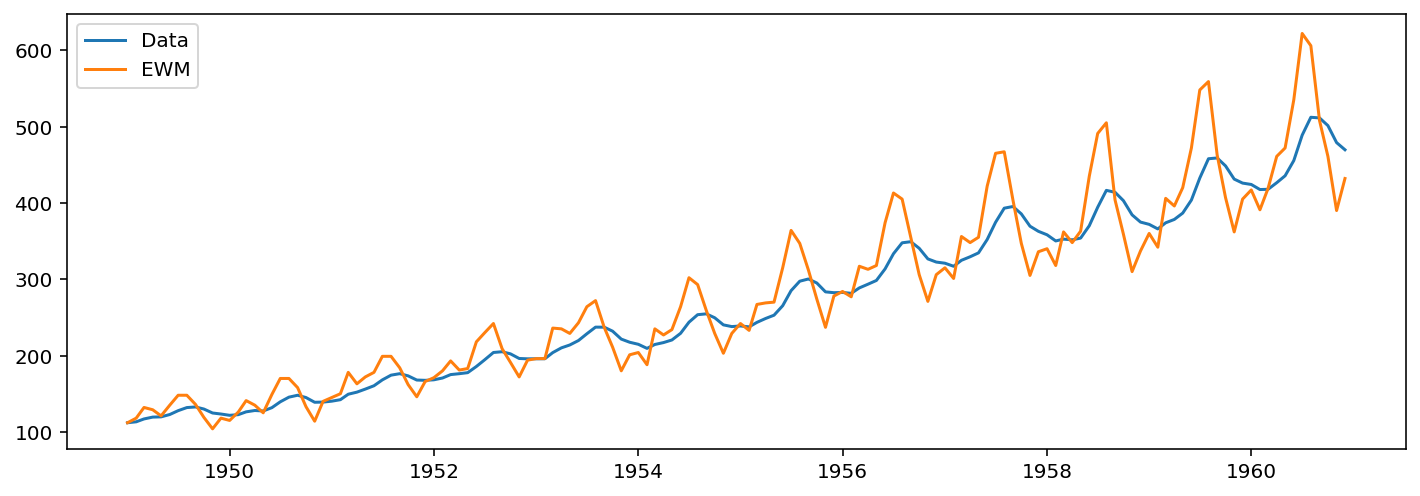

In [9]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(ewm_airline, label = 'Data')
plt.plot(airline, label = 'EWM')
plt.legend(loc = 'upper left')
plt.show()

### 3. Simple Exponential Smoothing Forecast

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [11]:
airline.index.freq = 'MS'

In [12]:
ses = SimpleExpSmoothing(airline['Passengers'])
res = ses.fit(smoothing_level=alpha, optimized = False)
forecast = res.forecast(24)
fitted = res.fittedvalues

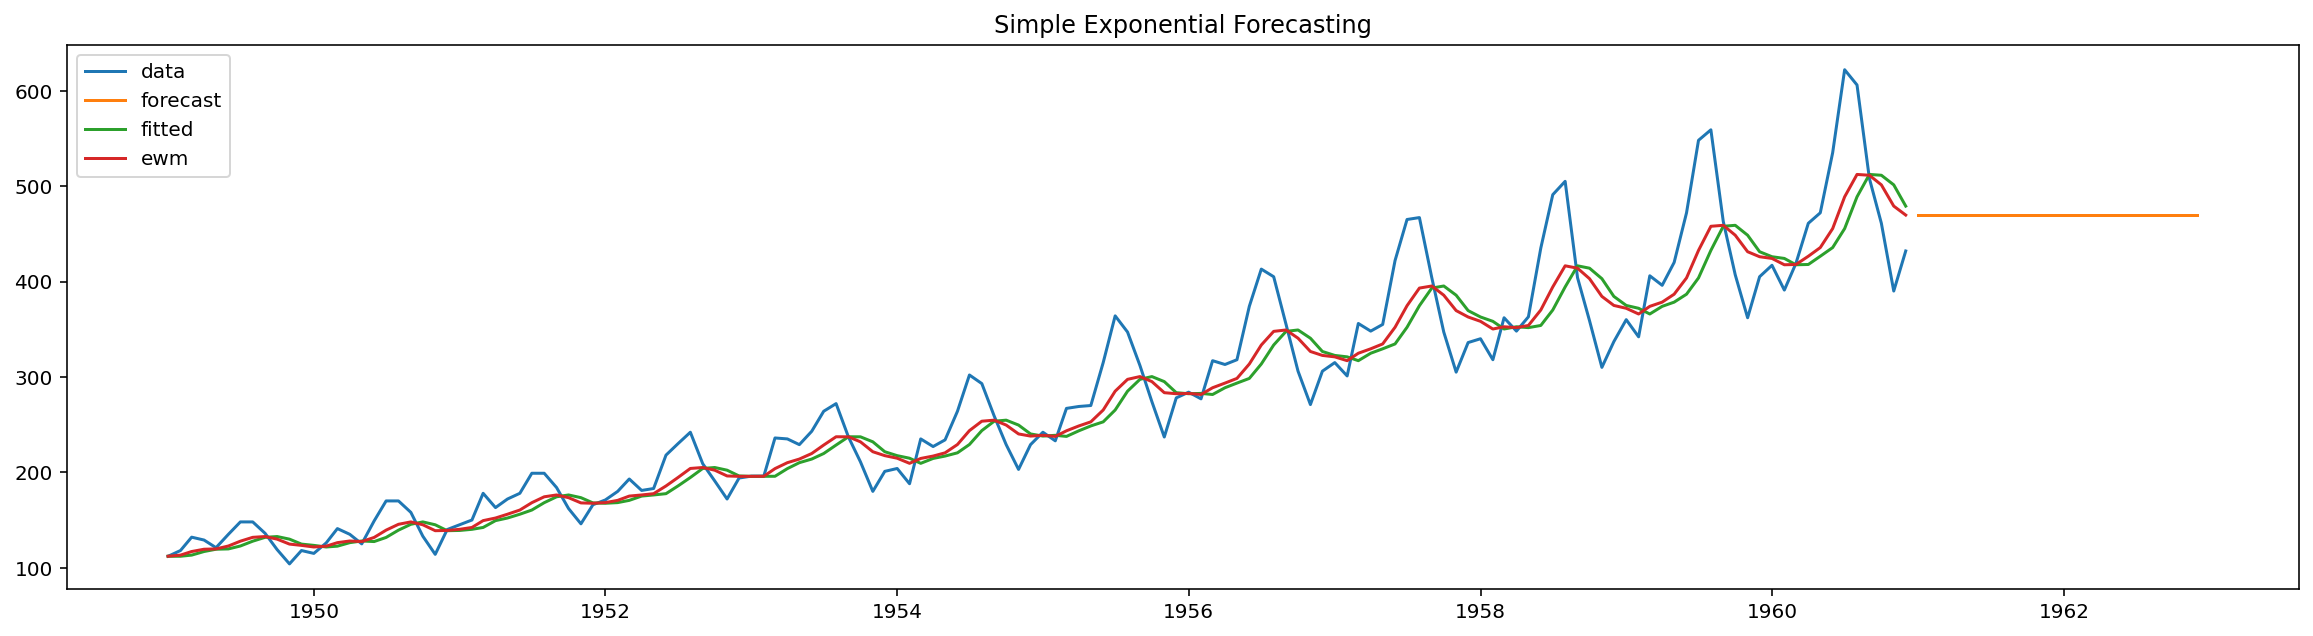

In [13]:
ewmpandas = airline['Passengers'].ewm(alpha = alpha, adjust = False).mean()
fig, ax = plt.subplots(figsize = (20,5))
plt.plot(airline, label = 'data')
plt.plot(forecast, label = 'forecast')
plt.plot(fitted, label = 'fitted')
plt.plot(ewmpandas, label = 'ewm')
plt.title("Simple Exponential Forecasting")
plt.legend(loc = 'upper left')
plt.show()

### 4. Holt's Linear Trend Model

In [14]:
from statsmodels.tsa.holtwinters import Holt

In [15]:
holt = Holt(airline['Passengers'])
res = holt.fit()
fitted = res.fittedvalues
forecast = res.forecast(24)

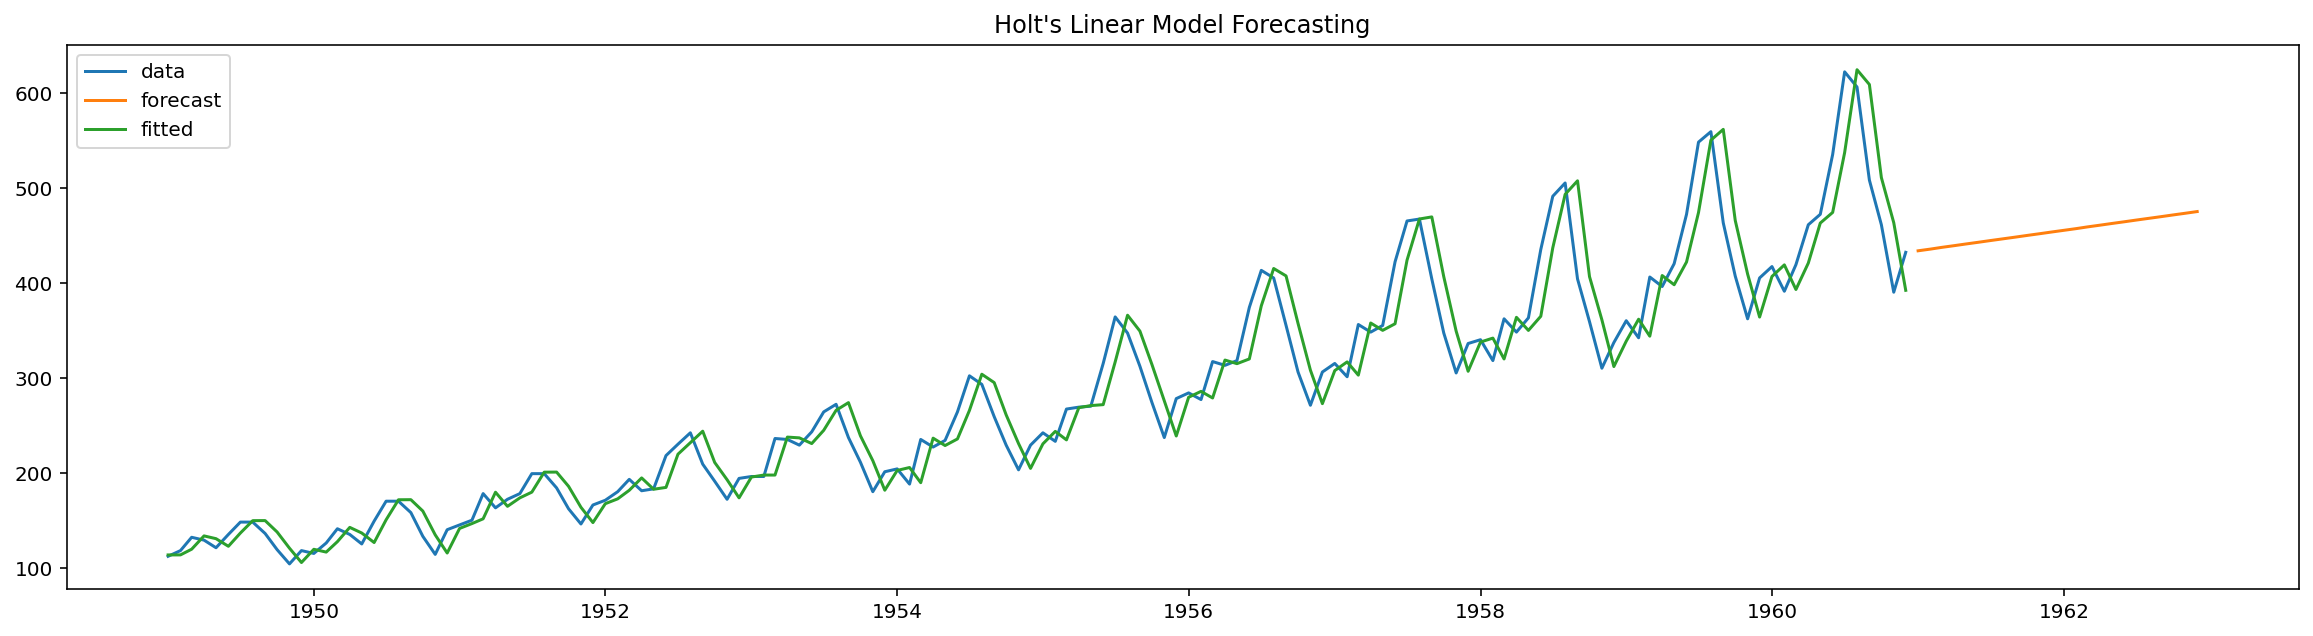

In [16]:
fig, ax = plt.subplots(figsize = (20,5))
plt.plot(airline, label = 'data')
plt.plot(forecast, label = 'forecast')
plt.plot(fitted, label = 'fitted')
plt.title("Holt's Linear Model Forecasting")
plt.legend(loc = 'upper left')
plt.show()

### 5. Holt Winters

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
hw = ExponentialSmoothing(airline['Passengers'], trend = 'add', seasonal = 'mul', seasonal_periods=12)
res = hw.fit()
fitted = res.fittedvalues
forecast = res.forecast(24)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


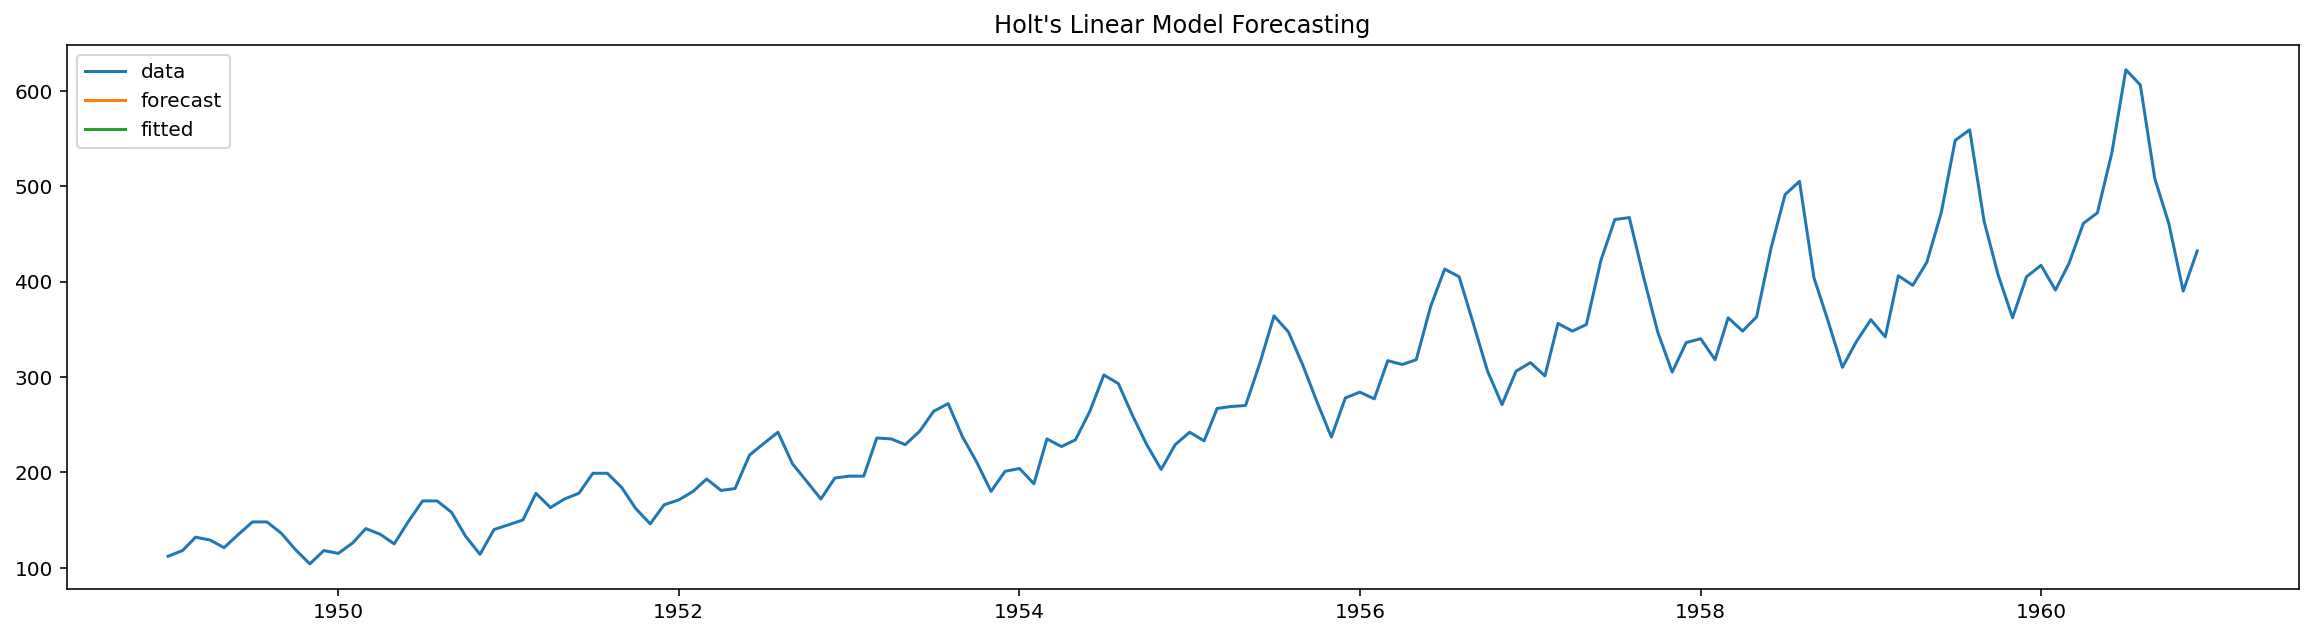

In [19]:
fig, ax = plt.subplots(figsize = (20,5))
plt.plot(airline, label = 'data')
plt.plot(forecast, label = 'forecast')
plt.plot(fitted, label = 'fitted')
plt.title("Holt's Linear Model Forecasting")
plt.legend(loc = 'upper left')
plt.show()

### 6. AutoRegressive

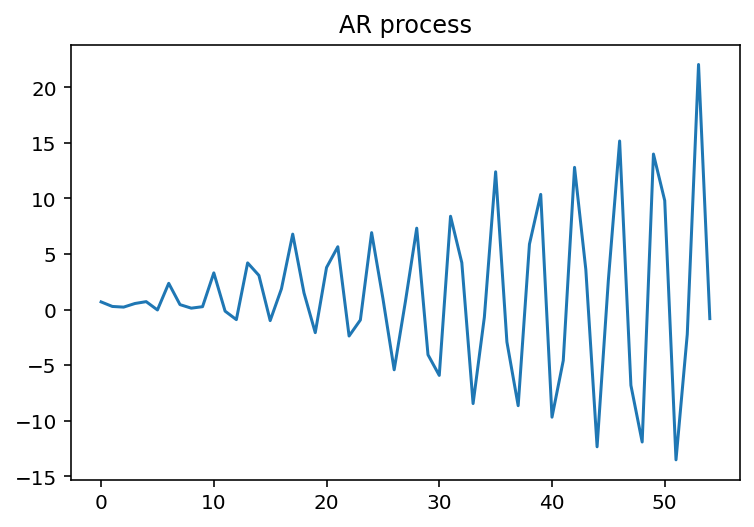

In [20]:
from scipy import stats
np.random.seed(123)
order = 5
values = np.random.random(size = order)
coefs = -1 + 2 * np.random.random(size = order)
b = np.random.random()
err_fn = stats.norm(loc = 0, scale = 1)
for _ in range(50):
    next_val = (coefs * values[-order:]).sum() + b + err_fn.rvs()
    values = np.append(values, next_val)
plt.plot(values)
plt.title("AR process")
plt.show()

### 7. Moving Average

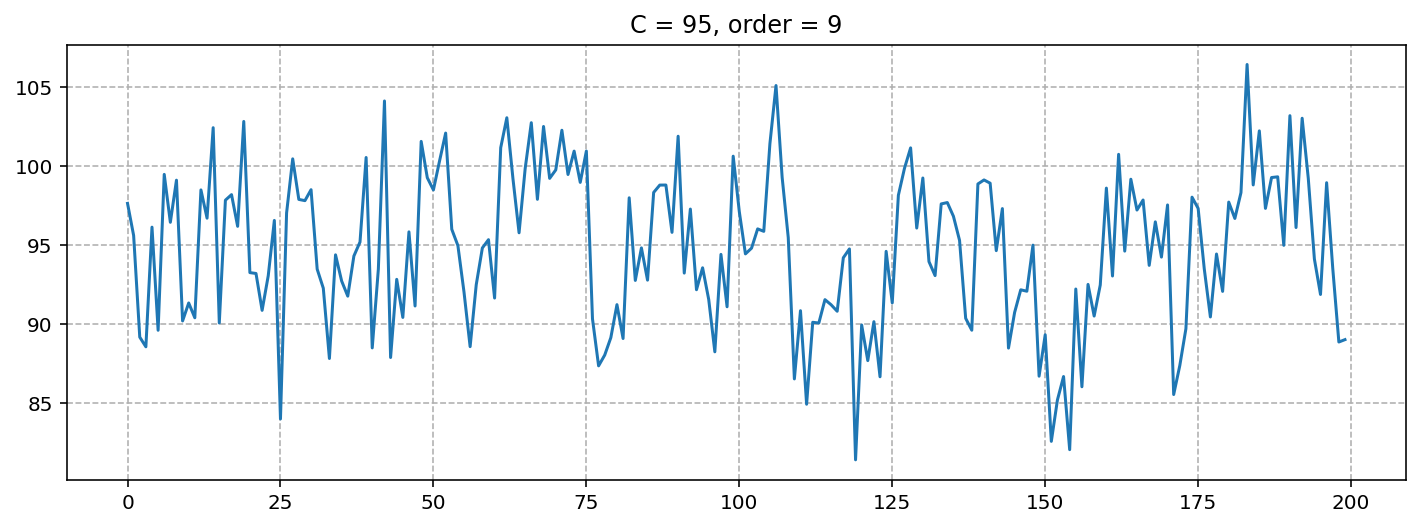

In [21]:
order = np.random.randint(1,10)
c = np.random.randint(1,100)

err_fn = stats.norm(0,3)
errs = err_fn.rvs(order-1)
ys = np.array([])
coefs = np.random.random(order-1)

for _ in range(200):
    err = err_fn.rvs()
    errs = np.append(errs, err)
    y = (coefs * errs[-(order-1):] ).sum() + err+ c
    ys = np.append(ys, y)

fig, ax = plt.subplots(figsize = (12,4))
plt.plot(ys)
plt.title(f"C = {c}, order = {order}")
plt.grid(linestyle = '--')
plt.show()

### 8. ARIMA

In [22]:
air = airline.copy()
air_diff1 = air.diff().dropna()
air_log = np.log(air)

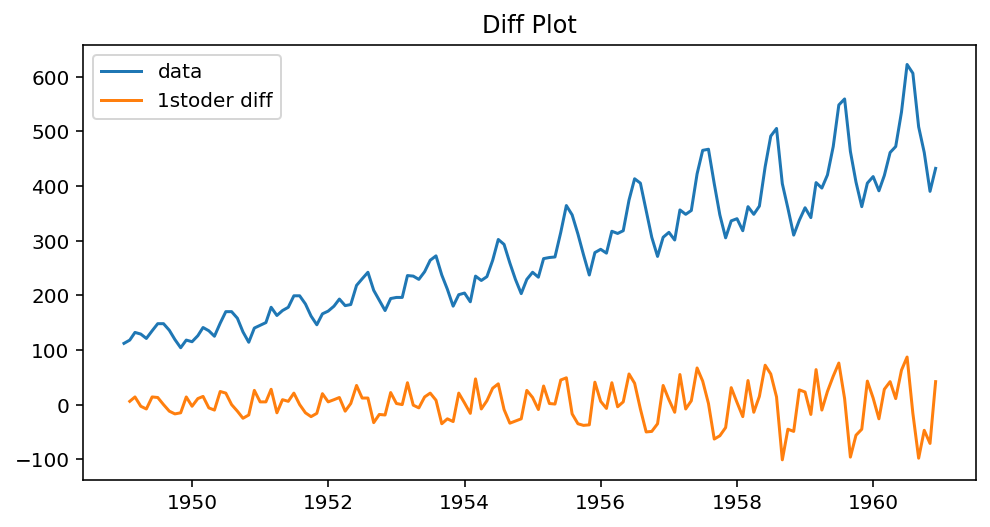

In [23]:
fig, ax = plt.subplots(figsize = (8,4))
plt.plot(air,label = 'data')
plt.plot(air_diff1, label = '1stoder diff')
plt.legend(loc = 'upper left')
plt.title("Diff Plot")
plt.show()

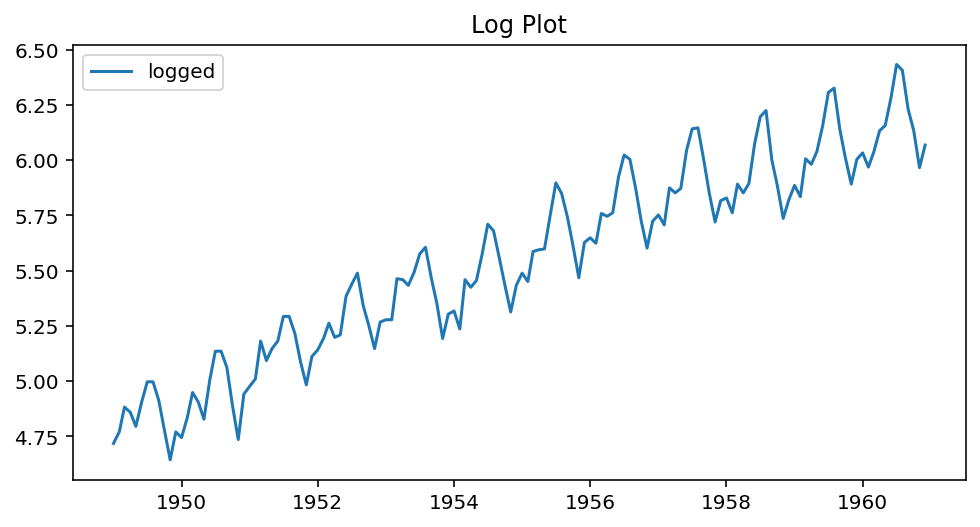

In [24]:
fig, ax = plt.subplots(figsize = (8,4))
plt.plot(air_log, label = 'logged')
plt.legend(loc = 'upper left')
plt.title("Log Plot")
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
Ntest = 12
train = air.iloc[:-Ntest]
test = air.iloc[-Ntest:]

**Fit and extract infomation**

In [27]:
arima = ARIMA(train['Passengers'], order = (1,0,0))
arima_result = arima.fit()
fitted = arima_result.fittedvalues
summary_df = arima_result.get_forecast(Ntest).summary_frame()
forecast = summary_df['mean']
lower = summary_df['mean_ci_lower']
upper = summary_df['mean_ci_upper']

**Plot forecast**

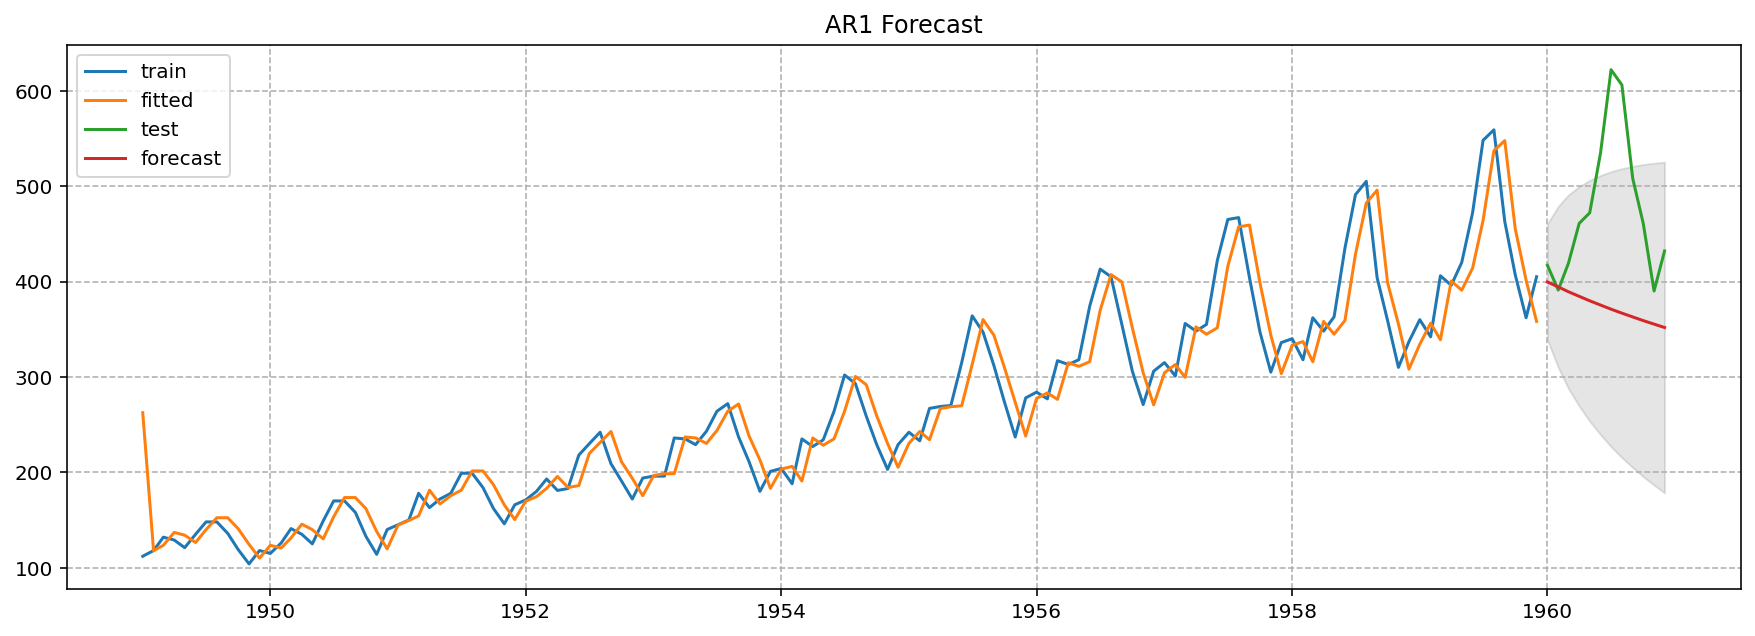

In [28]:
fig, ax = plt.subplots(figsize = (15,5))
plt.plot(train, label = 'train')
plt.plot(fitted, label = 'fitted')
plt.plot(test, label = 'test')
plt.plot(forecast, label = 'forecast')
plt.grid(linestyle='--')
plt.legend(loc = 'upper left')
plt.title("AR1 Forecast")
ax.fill_between(summary_df.index, lower, upper, color='k', alpha=0.1)
plt.show()

In [29]:
def experiment(arima):
    arima_result = arima.fit()
    fitted = arima_result.fittedvalues
    summary_df = arima_result.get_forecast(Ntest).summary_frame()
    forecast = summary_df['mean']
    lower = summary_df['mean_ci_lower']
    upper = summary_df['mean_ci_upper']
    
    fig, ax = plt.subplots(figsize = (15,5))
    plt.plot(train, label = 'train')
    plt.plot(fitted, label = 'fitted')
    plt.plot(test, label = 'test')
    plt.plot(forecast, label = 'forecast')
    plt.grid(linestyle='--')
    plt.legend(loc = 'upper left')
    plt.title("AR Forecast")
    ax.fill_between(summary_df.index, lower, upper, color='k', alpha=0.1)
    plt.show()
    

**Test a AR(12) model**

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


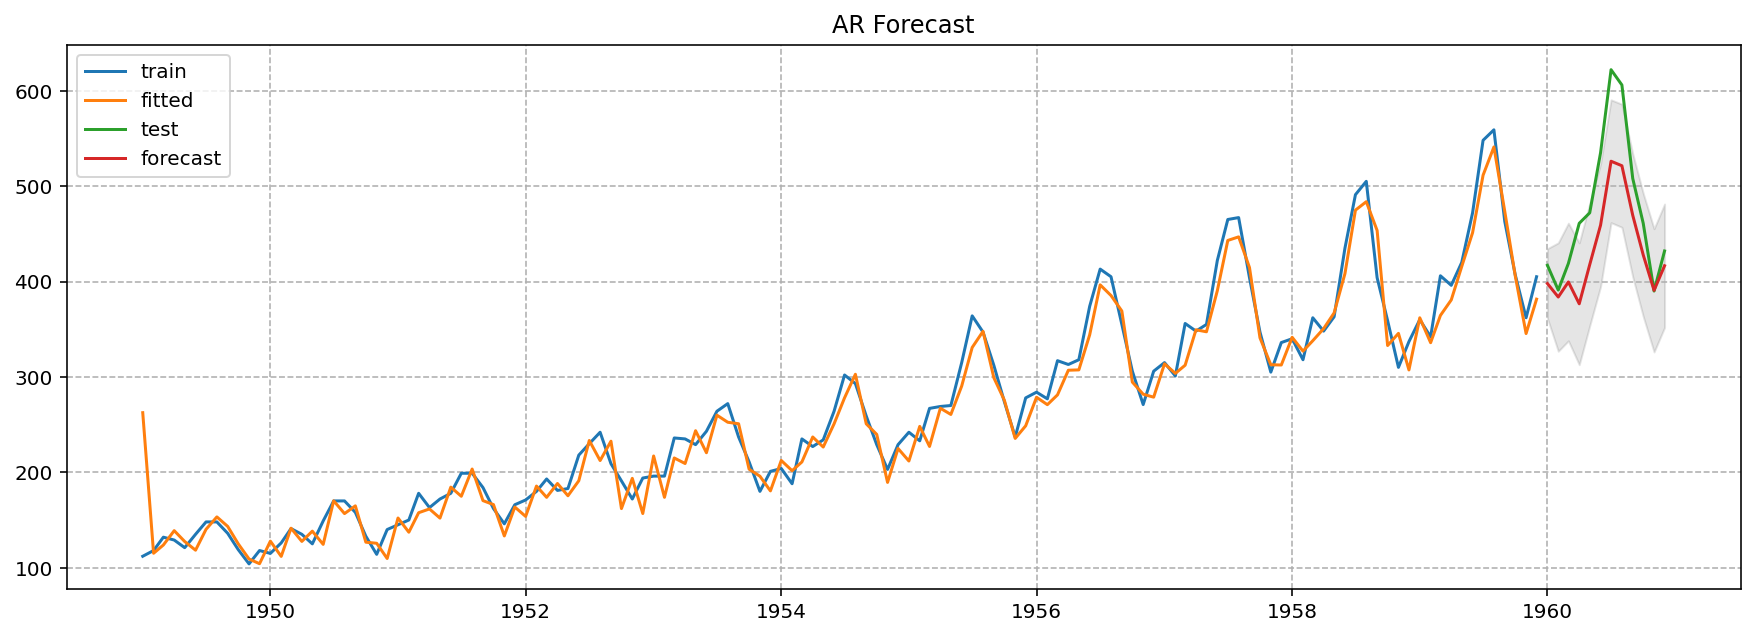

In [30]:
experiment(ARIMA(train['Passengers'], order = (12,0,0)))

**Test a MA(1) model**

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


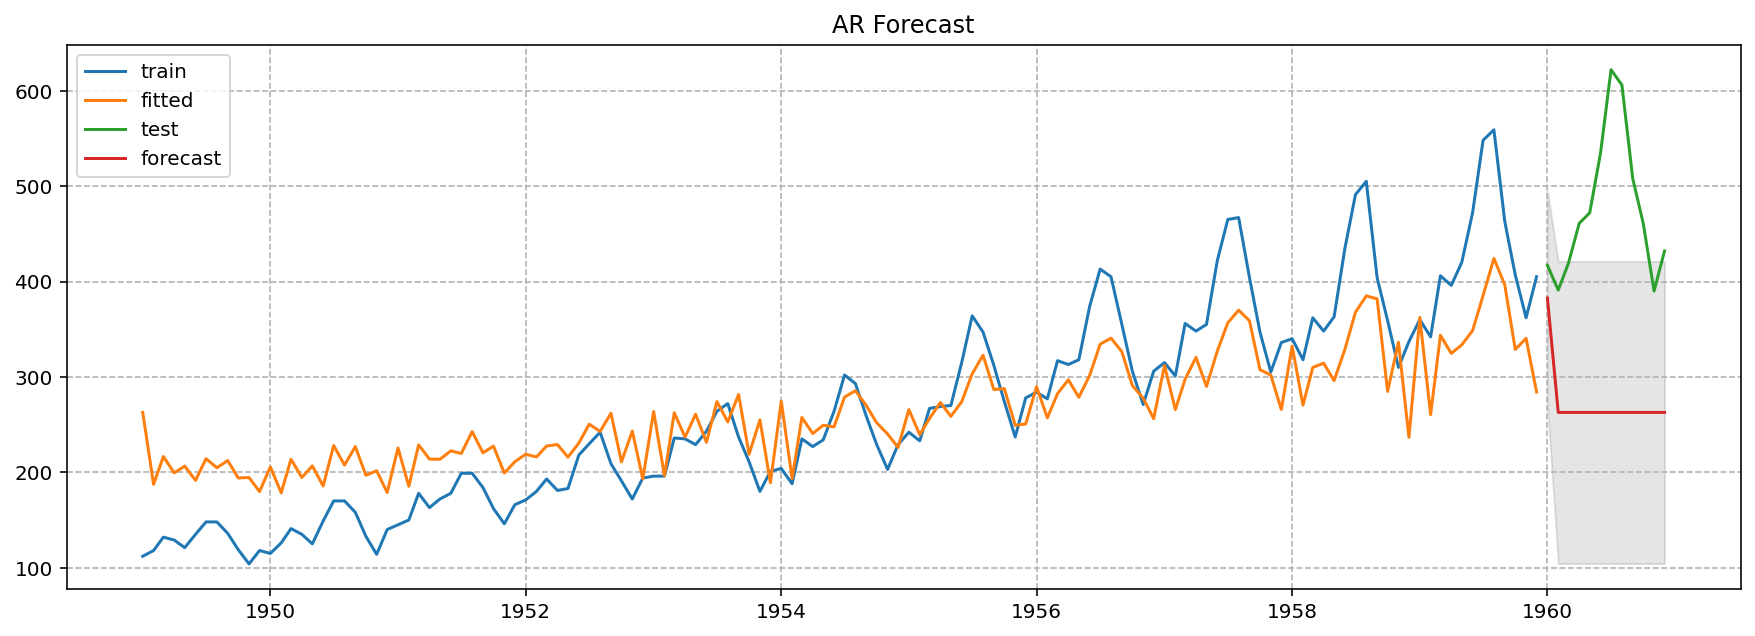

In [31]:
experiment(ARIMA(train['Passengers'], order = (0,0,1)))

**Test First Order Difference**

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


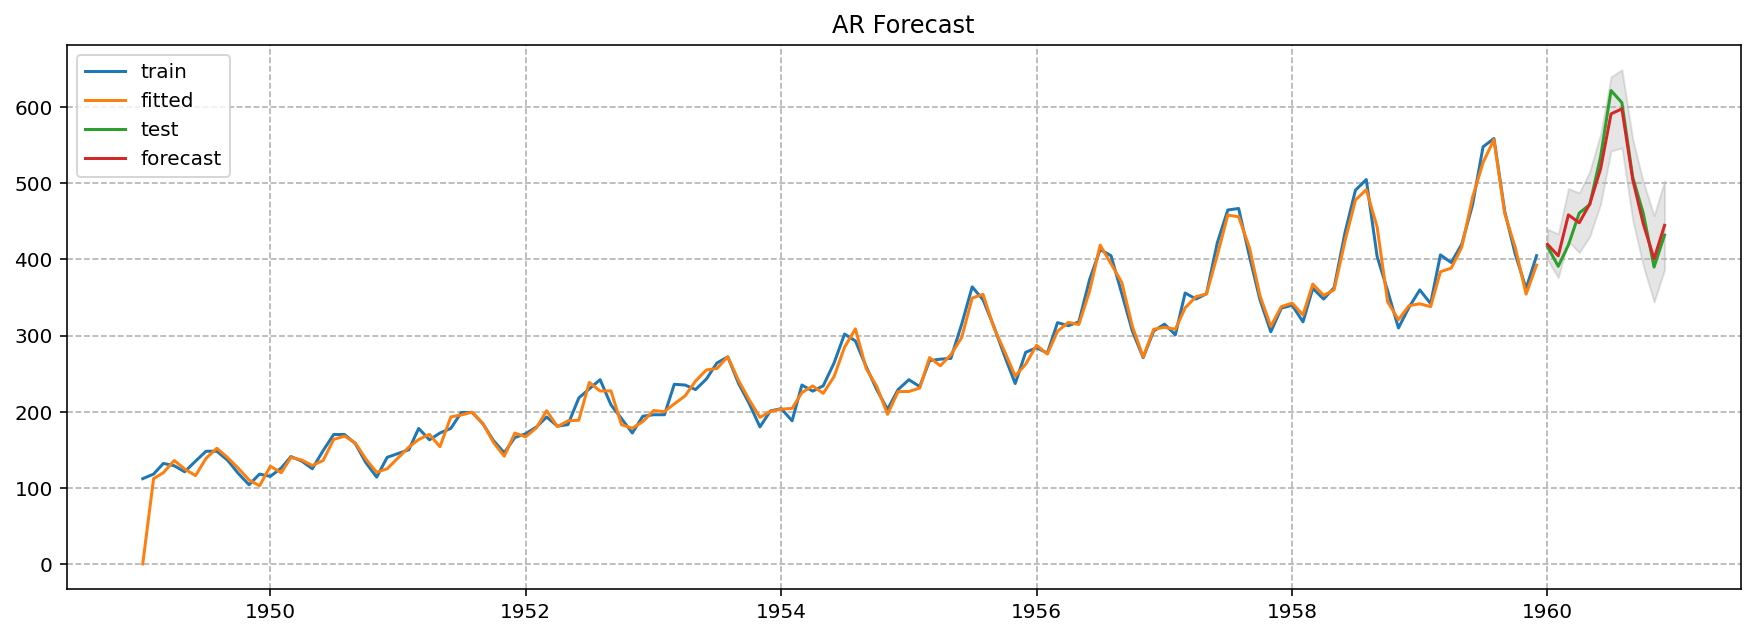

In [32]:
experiment(ARIMA(train['Passengers'], order = (12,1,0)))

**Test more complicated Model**

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


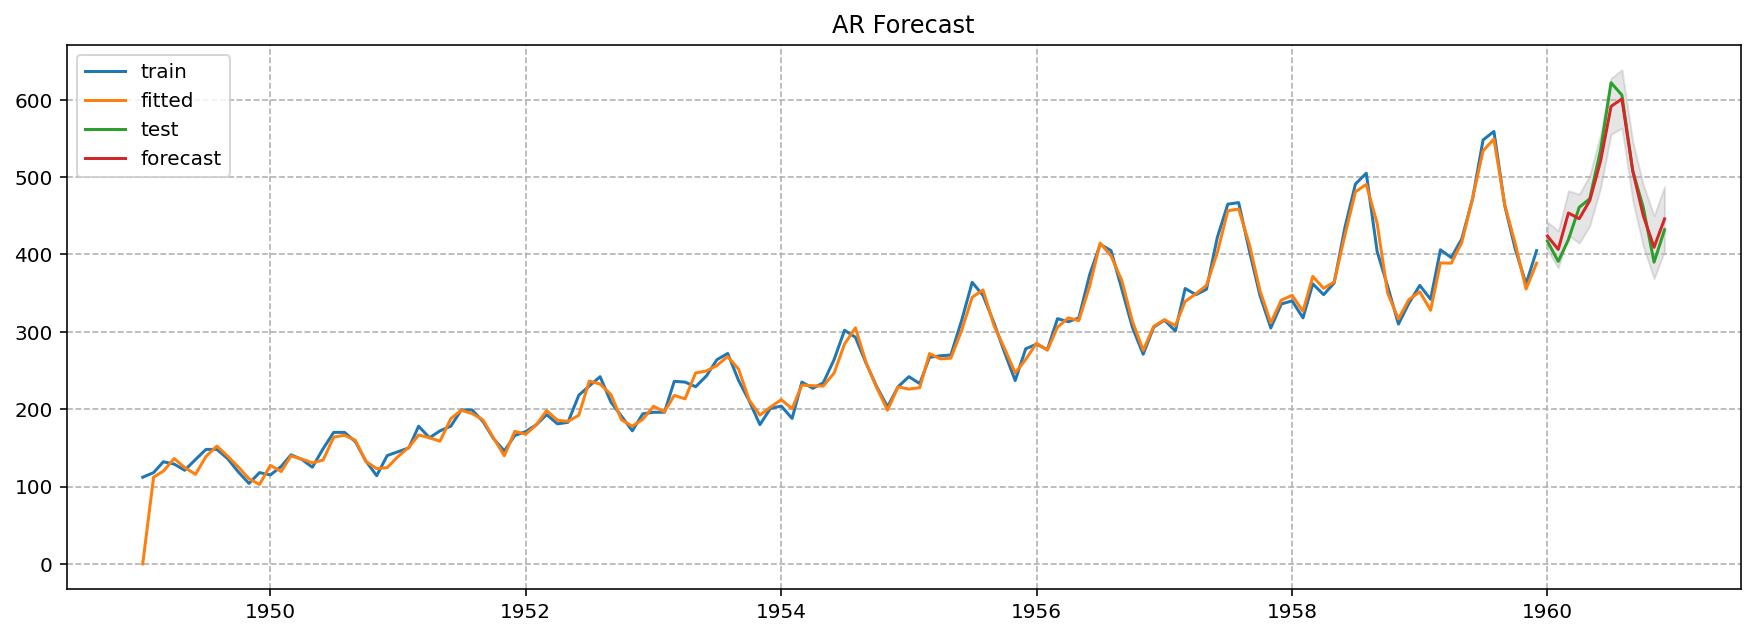

In [33]:
experiment(ARIMA(train['Passengers'], order = (12,1,12)))

### 9. Stationary and Adfuller test

In [34]:
from statsmodels.tsa.stattools import adfuller
alpha = 0.05
adf, pvalue, used_lag, nobs, critical_values, icbest = adfuller(airline['Passengers'])
"Stationary" if pvalue < alpha else "Not Stationary"

'Not Stationary'

In [35]:
def test_stationary(series, alpha = 0.05):
    adf, pvalue, used_lag, nobs, critical_values, icbest = adfuller(series)
    result = "Stationary" if pvalue < alpha else "Not Stationary"
    print("Test Statistics: {}".format(adf))
    print("P value: {}".format(pvalue))
    print(result)

In [36]:
test_stationary(airline['Passengers'])

Test Statistics: 0.8153688792060498
P value: 0.991880243437641
Not Stationary


In [37]:
test_stationary(np.log(airline['Passengers']))

Test Statistics: -1.7170170891069683
P value: 0.4223667747703874
Not Stationary


In [38]:
test_stationary(airline['Passengers'].diff().dropna())

Test Statistics: -2.8292668241700047
P value: 0.05421329028382478
Not Stationary


In [39]:
test_stationary(np.log(airline['Passengers']).diff().dropna())

Test Statistics: -2.717130598388114
P value: 0.07112054815086184
Not Stationary


**Test a Stock Return**

In [40]:
test_stationary(np.log(goog).diff().dropna() + 1)

Test Statistics: -29.185893355176606
P value: 0.0
Stationary


### 10 ACF and PACF

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

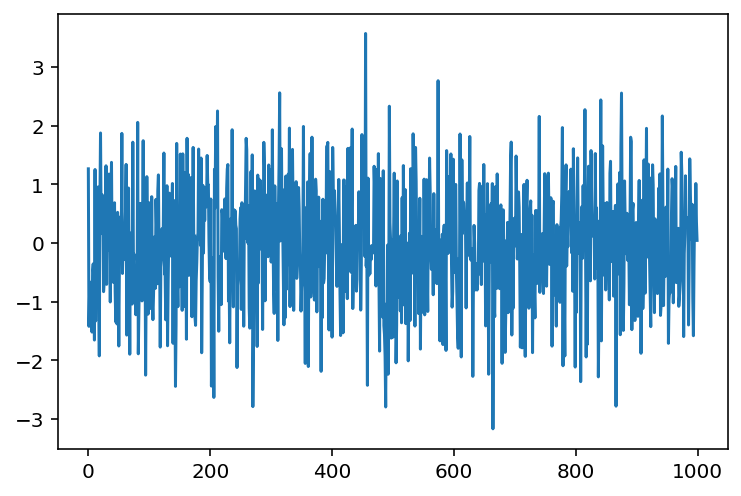

In [42]:
x0 = np.random.randn(1000)
plt.plot(x0)
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


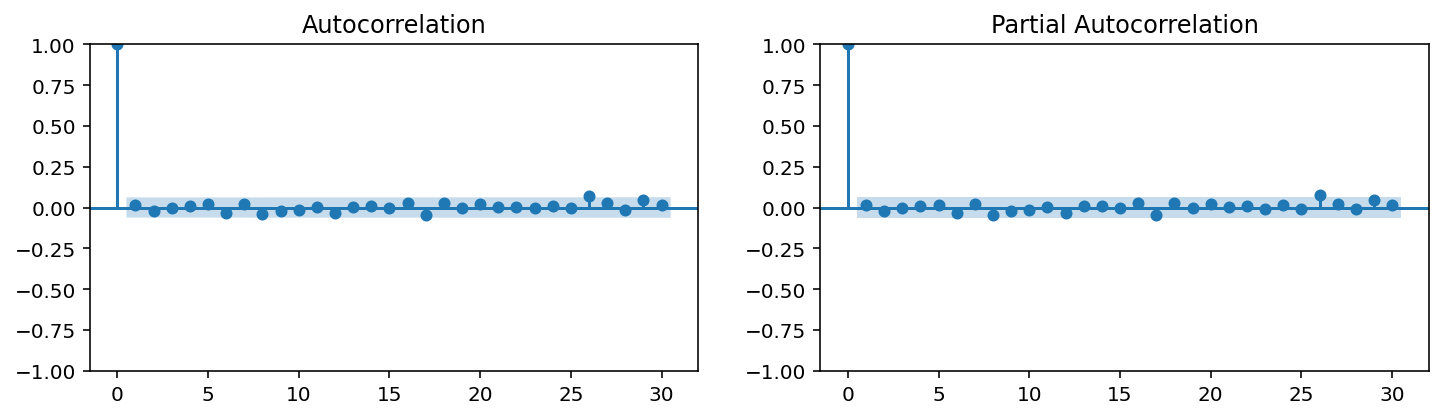

In [43]:
fig, ax = plt.subplots(figsize = (12,3))
ax1 = plt.subplot(1,2,1)
_ = plot_acf(x0, ax = ax1)
ax2 = plt.subplot(1,2,2)
_ = plot_pacf(x0, ax = ax2)
plt.show()

In [44]:
def plot_acf_and_pacf(series):
    fig, ax = plt.subplots(figsize = (12,3))
    ax1 = plt.subplot(1,2,1)
    _ = plot_acf(series, ax = ax1)
    ax2 = plt.subplot(1,2,2)
    _ = plot_pacf(series, ax = ax2)
    plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


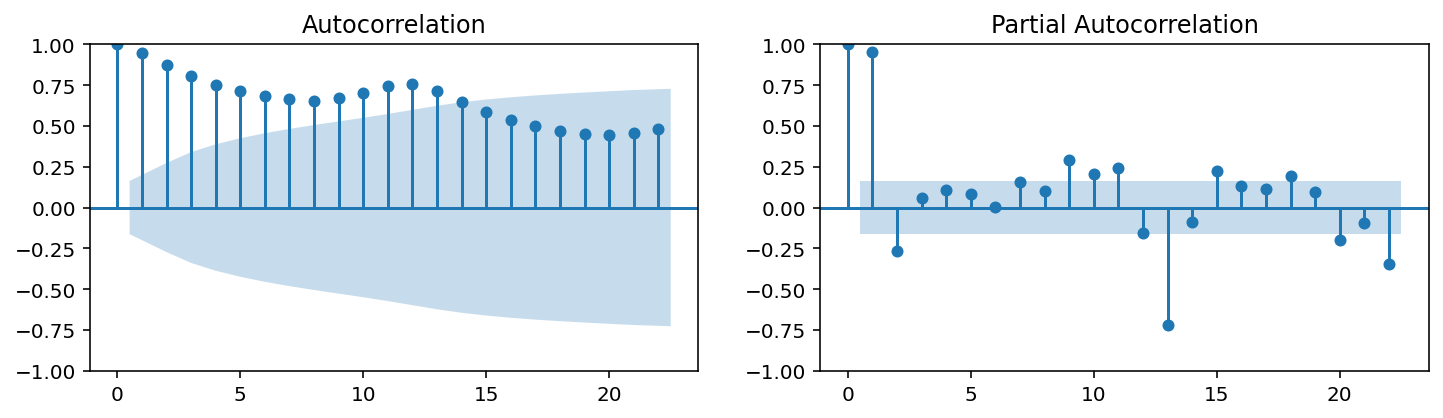

In [45]:
plot_acf_and_pacf(airline['Passengers'])

In [46]:
Ntest = 12
air = airline.copy()
train = air.iloc[:-Ntest]
test = air.iloc[-Ntest:]

### 11. Auto Arima, SARIMA, SARIMAX

In [47]:
import pmdarima as pm

In [48]:
model = pm.auto_arima(
    train['Passengers'], 
    trace = True, 
    suppress_warnings=True, 
    seasonal=True, 
    m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.28 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.25 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.68 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.19 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.17 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.33 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.08 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.25 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [49]:
model = pm.auto_arima(
    train['Passengers'], 
    trace = True, 
    suppress_warnings=True, 
    max_p=12, max_q = 2, max_order = 14, seasonal = False,stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1254.439, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1245.588, Time=0.26 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [50]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 2)   Log Likelihood                -494.031
Date:                Sun, 31 Jul 2022   AIC                           1020.062
Time:                        06:06:46   BIC                           1066.065
Sample:                             0   HQIC                          1038.755
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1064      3.022      2.020      0.043       0.183      12.030
ar.L1         -0.0766      0.143     -0.536      0.592      -0.357       0.203
ar.L2         -0.2993      0.142     -2.113      0.035      -0.577      -0.022
ar.L3         -0.1341      0.117     -1.150      0.250      -0.363       0.094
ar.L4         -0.2843      0.115     -2.481      0.013      -0.509      -0.060
ar.L5         -0.0920      0.116     -0.791      0.429      -0.320       0.136
ar.L6         -0.3053      0.112     -2.716      0.007      -0.526      -0.085
ar.L7         -0.1007      0.124     -0.814      0.416      -0.343       0.142
ar.L8         -0.3147      0.120     -2.624      0.009      -0.550      -0.080
ar.L9         -0.0836      0.120     -0.695      0.487      -0.319       0.152
ar.L10        -0.3178      0.129     -2.470      0.014      -0.570      -0.066
ar.L11        -0.0756      0.130     -0.584      0.559      -0.330       0.178
ar.L12         0.6367      0.126      5.060      0.000       0.390       0.883
ma.L1         -0.0960      0.157     -0.610      0.542      -0.404       0.212
ma.L2          0.2344      0.185      1.266      0.206      -0.129       0.597
sigma2        97.8915     15.342      6.381      0.000      67.821     127.962
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.03
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

In [52]:
# fitted_values = model.predict_in_sample(start = 0, end = -1)

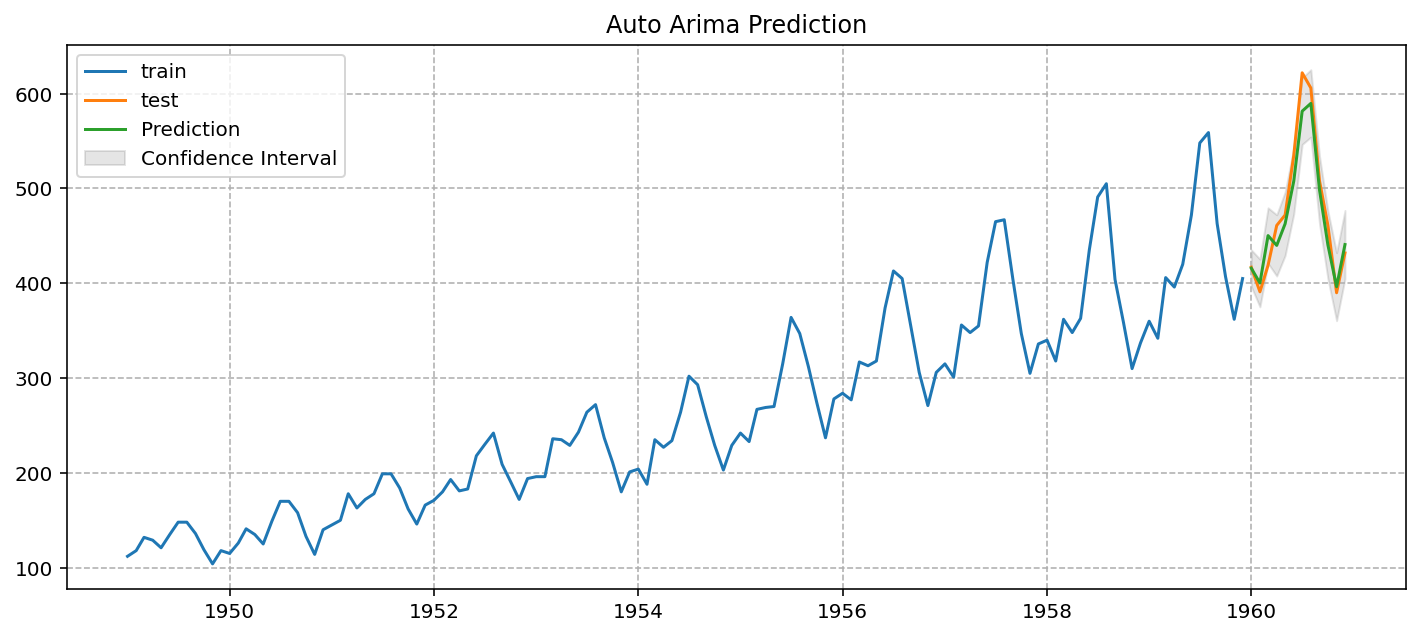

In [53]:
fig, ax = plt.subplots(figsize = (12,5))
plt.plot(train,label = 'train')
plt.plot(test,label = 'test')
plt.plot(test.index, test_pred, label = 'Prediction')
# plt.plot(train.index, fitted_values, label = 'Fitted', alpha = 0.6, lw = 2)
ax.fill_between(test.index, confint[:,0], confint[:,1], color='k', alpha=0.1, label = 'Confidence Interval')
plt.legend(loc = 'upper left')
plt.grid(linestyle = '--')
plt.title("Auto Arima Prediction")
plt.show()